<a href="https://colab.research.google.com/github/Mubarok982/DM_ML/blob/main/UAS_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Dataset

In [118]:
data =  pd.read_csv("datapemilu.csv")
data.head()

,no,Nama Partai,Nama Calon Legislatif,Jenis KeLamin,Kecamatan,No Urut Parpol,Suara Sah Partai,Jumlah Perolehan Kursi,Daerah Pemilihan,No Urut Caleg,Suara Sah Caleg,Terpilih atau Tidak
0,1,Partai Hati Nurani Rakyat,"H. Jamaluddin Lamanda, SH",L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,1,2425,TIDAK
1,2,Partai Hati Nurani Rakyat,Suprawito,L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,2,3348,YA
2,3,Partai Hati Nurani Rakyat,Hj. Endang Barnita,P,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,3,470,TIDAK
3,4,Partai Hati Nurani Rakyat,Syarifuddin,L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,4,424,TIDAK
4,5,Partai Hati Nurani Rakyat,Iksan S. Chaeruddin,L,Kota Administrasi Jakarta Utara,1,20917,6,DP-1,5,959,TIDAK


# A. Data Prepocessing

## A.1 Mencari Ringkasan dari Dataset

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   no                      2268 non-null   int64 
 1   Nama Partai             2268 non-null   object
 2   Nama Calon Legislatif   2268 non-null   object
 3   Jenis KeLamin           2268 non-null   object
 4   Kecamatan               2267 non-null   object
 5   No Urut Parpol          2268 non-null   int64 
 6   Suara Sah Partai        2268 non-null   object
 7   Jumlah Perolehan Kursi  2268 non-null   int64 
 8   Daerah Pemilihan        2268 non-null   object
 9   No Urut Caleg           2268 non-null   int64 
 10  Suara Sah Caleg         2268 non-null   object
 11  Terpilih atau Tidak     2268 non-null   object
dtypes: int64(4), object(8)
memory usage: 212.8+ KB


## A.2 Menghapus kolom "No" Karena tidak memiliki begitu banyak pengaruh dalam prediksi

In [120]:
data.drop('no', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nama Partai             2268 non-null   object
 1   Nama Calon Legislatif   2268 non-null   object
 2   Jenis KeLamin           2268 non-null   object
 3   Kecamatan               2267 non-null   object
 4   No Urut Parpol          2268 non-null   int64 
 5   Suara Sah Partai        2268 non-null   object
 6   Jumlah Perolehan Kursi  2268 non-null   int64 
 7   Daerah Pemilihan        2268 non-null   object
 8   No Urut Caleg           2268 non-null   int64 
 9   Suara Sah Caleg         2268 non-null   object
 10  Terpilih atau Tidak     2268 non-null   object
dtypes: int64(3), object(8)
memory usage: 195.0+ KB


## A.3 Mencari Missing Value Pada dataset

In [121]:
data = data.isnull().sum()
print(data)

Nama Partai               0
Nama Calon Legislatif     0
Jenis KeLamin             0
Kecamatan                 1
No Urut Parpol            0
Suara Sah Partai          0
Jumlah Perolehan Kursi    0
Daerah Pemilihan          0
No Urut Caleg             0
Suara Sah Caleg           0
Terpilih atau Tidak       0
dtype: int64


# terdapat missing value pada kolom kecamatan sebanyak 1 baris, selanjutnya kita akan menghapus baris tersebut

## A.4 Membuat visualisasi untuk melihat distribusi data

### A.4.1 Distribusi kolom kategorikal

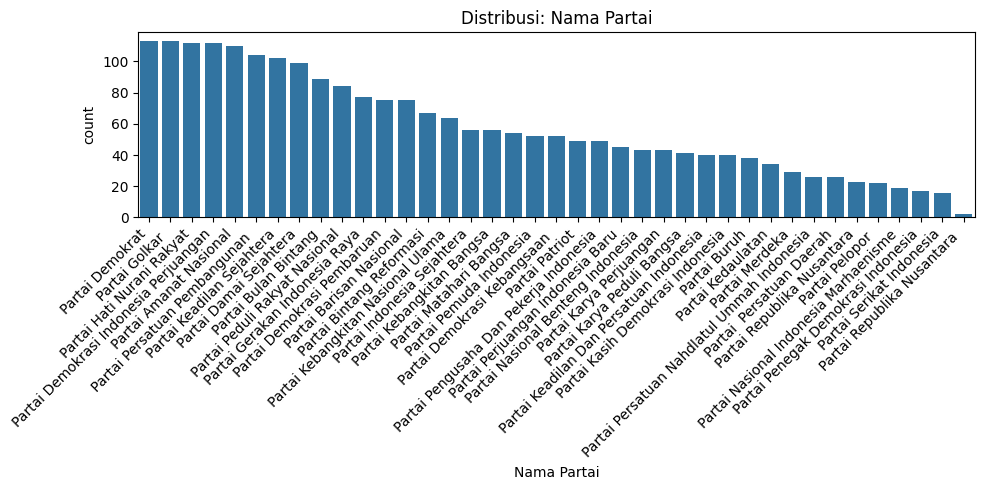

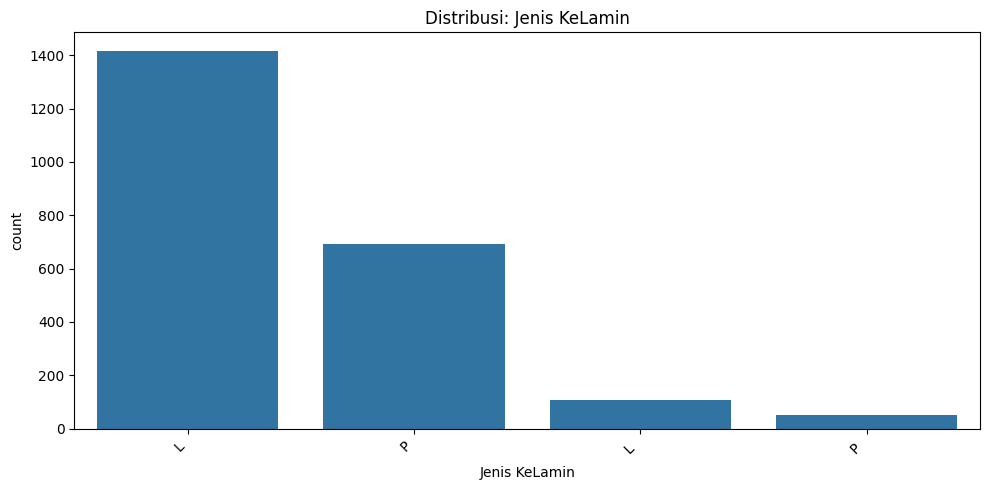

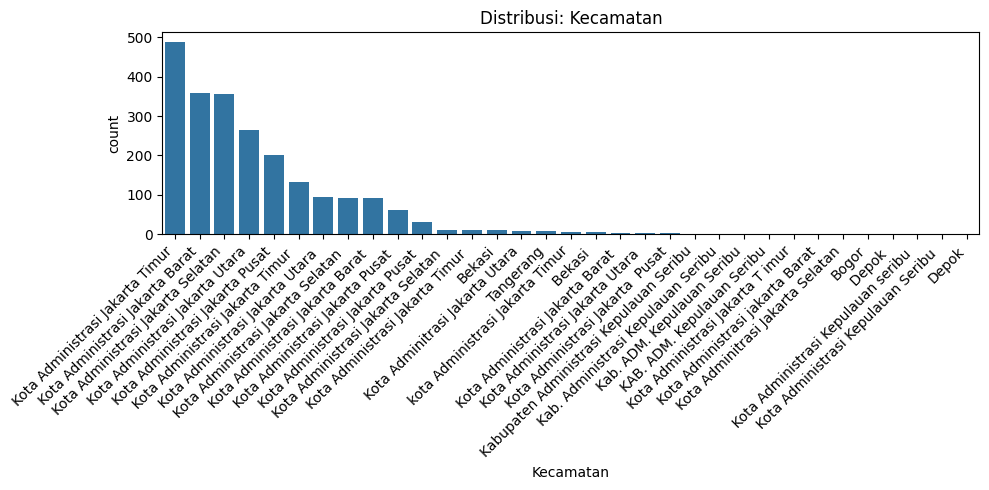

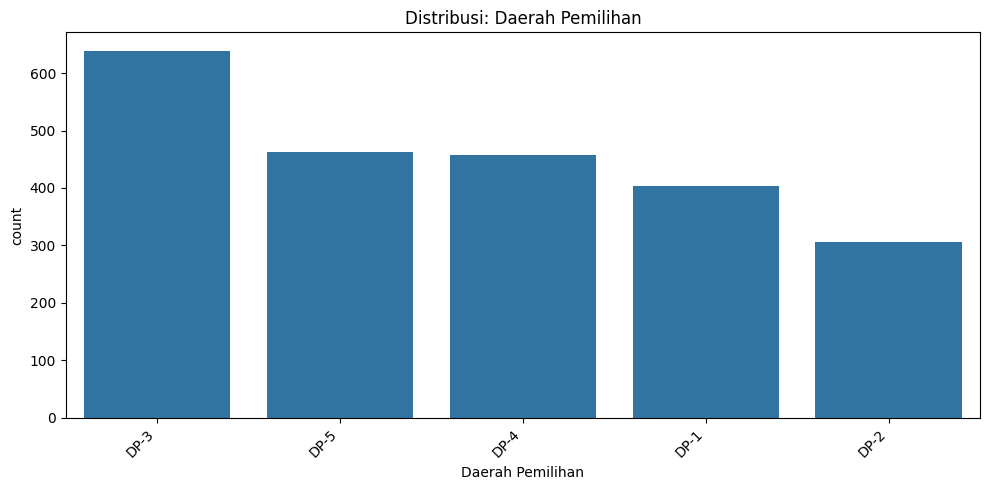

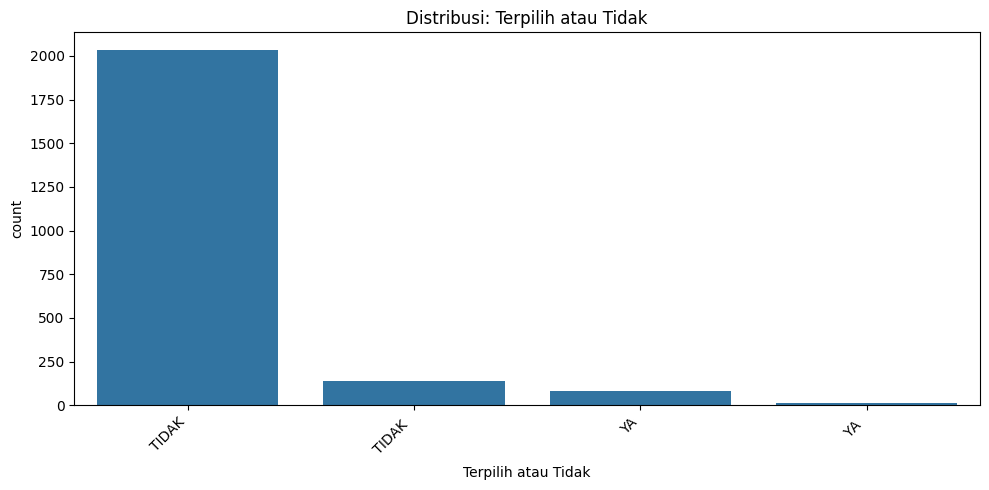

In [122]:
data = pd.read_csv('datapemilu.csv')
# Bersihkan nama kolom
data.columns = data.columns.str.strip()

# Bersihkan kolom angka jadi numerik
def bersihkan_angka_kolom(kolom):
    return (
        kolom.astype(str)
             .str.strip()
             .str.replace('.', '', regex=False)
             .str.replace(',', '', regex=False)
             .astype(int)
    )

data['Suara Sah Partai'] = bersihkan_angka_kolom(data['Suara Sah Partai'])
data['Suara Sah Caleg'] = bersihkan_angka_kolom(data['Suara Sah Caleg'])

# Visualisasi kolom kategorikal
categorical_cols = [
    'Nama Partai',
    'Jenis KeLamin',
    'Kecamatan',
    'Daerah Pemilihan',
    'Terpilih atau Tidak'
]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribusi: {col}')
    plt.tight_layout()
    plt.show()


### A.4.2 Distribusi kolom numerik

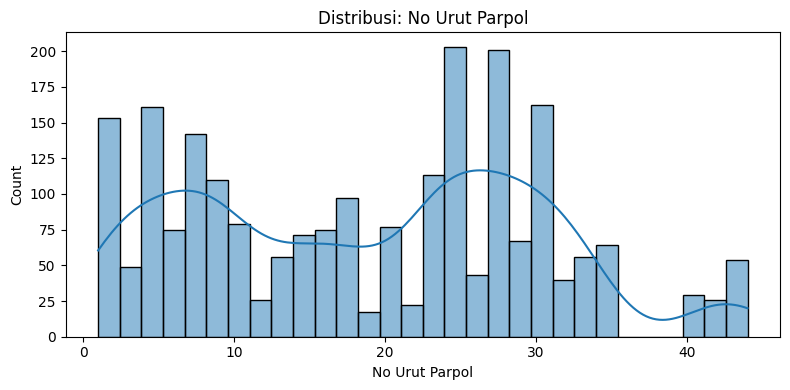

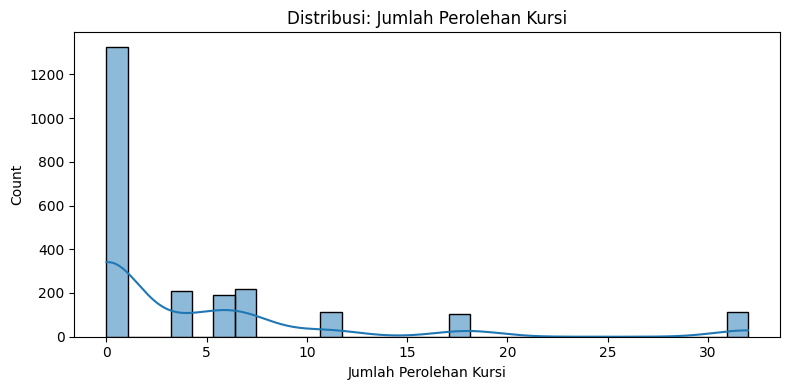

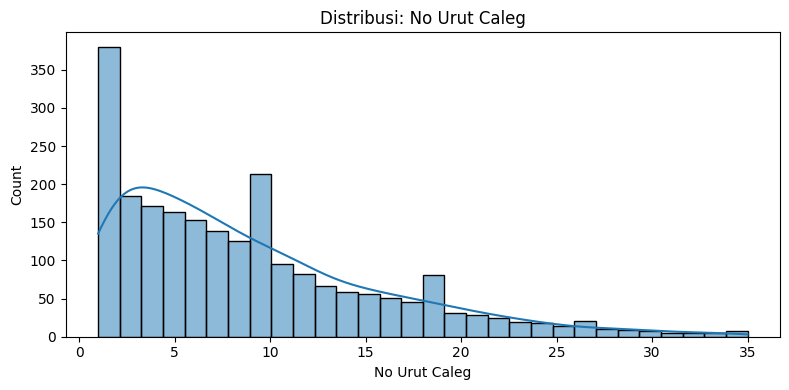

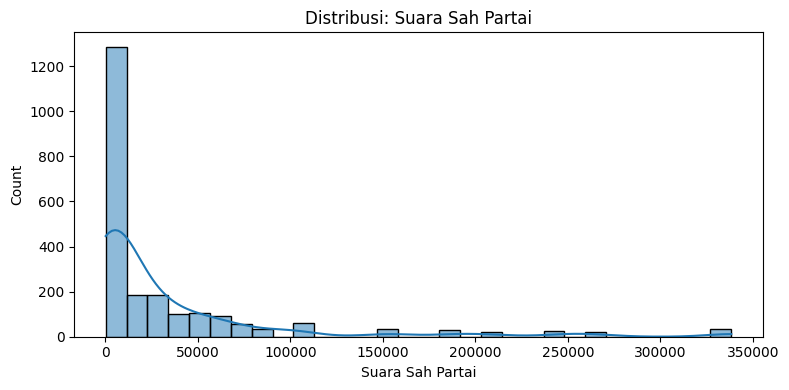

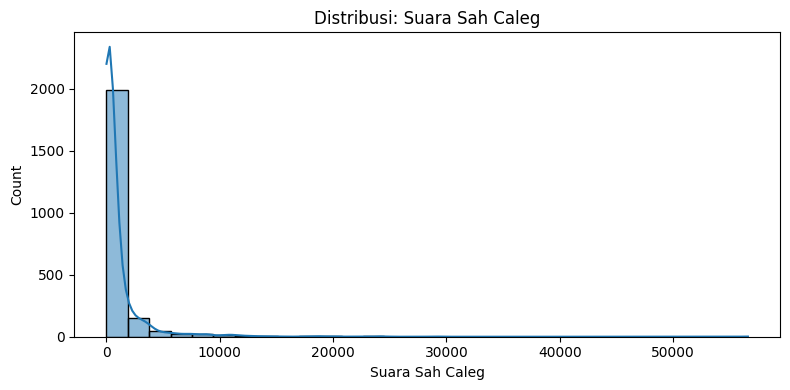

In [123]:
# Visualisasi kolom numerik
numeric_cols = [
    'No Urut Parpol',
    'Jumlah Perolehan Kursi',
    'No Urut Caleg',
    'Suara Sah Partai',
    'Suara Sah Caleg'
]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.tight_layout()
    plt.show()


### A.4.3 Rename Kolom "terpilih atau tidak" menjadi "terpilih" lalu paksakan konsistensi di kolomnya sehingga hanya ada target "ya" dan "tidak"

['tidak' 'ya']


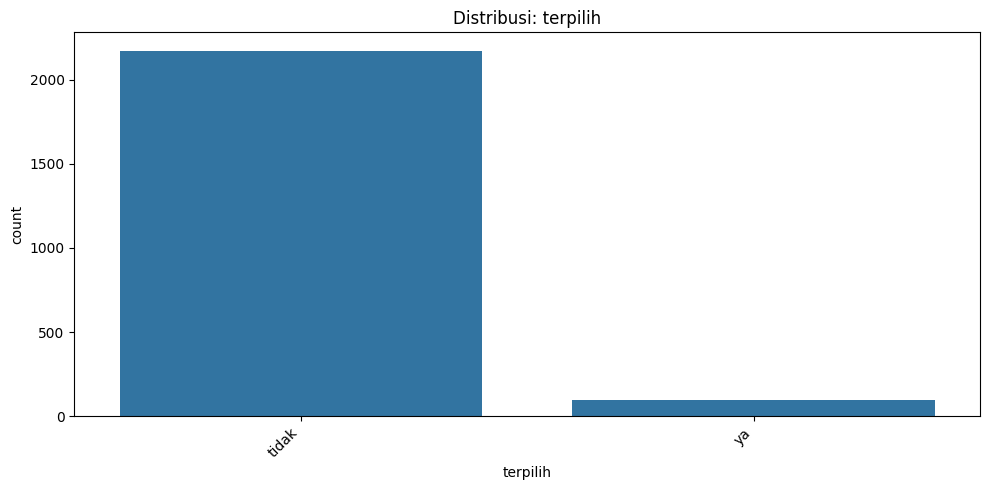

In [124]:
# Rename kolom
data = data.rename(columns={"Terpilih atau Tidak": "terpilih"})

# Bersihkan isinya: hilangkan spasi, ubah huruf kecil
data["terpilih"] = (
    data["terpilih"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Cek hasil
print(data["terpilih"].unique())

# Visualisasi kolom kategorikal
categorical_cols = [
    'terpilih'
]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribusi: {col}')
    plt.tight_layout()
    plt.show()

### A.4.4 Memperbaiki spasi pada isi kolom "Jenis KeLamin" agar hanya ada 2 jenis kelamin

['L' 'P']


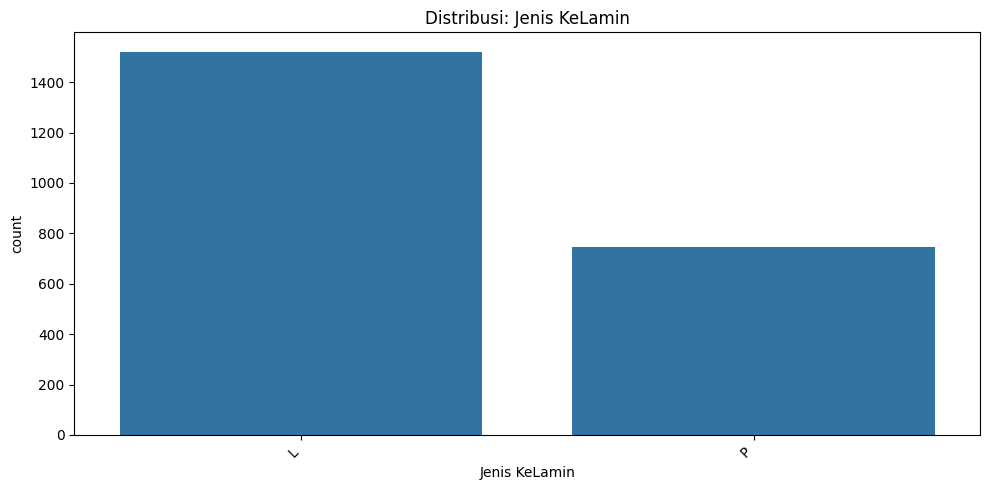

In [125]:
# Bersihkan kolom Jenis KeLamin
data["Jenis KeLamin"] = (
    data["Jenis KeLamin"]
    .astype(str)
    .str.strip()
    .str.upper()
)

# Cek hasil unik
print(data["Jenis KeLamin"].unique())

# Visualisasi kolom kategorikal
categorical_cols = [
    'Jenis KeLamin'
]

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribusi: {col}')
    plt.tight_layout()
    plt.show()

# B. Data cleaning

## B.1 Menghapus baris data  dengan missing value

In [126]:
# Hapus baris yang memiliki missing value
data = data.dropna()
print(data.isnull().sum())
data.info()

no                        0
Nama Partai               0
Nama Calon Legislatif     0
Jenis KeLamin             0
Kecamatan                 0
No Urut Parpol            0
Suara Sah Partai          0
Jumlah Perolehan Kursi    0
Daerah Pemilihan          0
No Urut Caleg             0
Suara Sah Caleg           0
terpilih                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2267 entries, 0 to 2267
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   no                      2267 non-null   int64 
 1   Nama Partai             2267 non-null   object
 2   Nama Calon Legislatif   2267 non-null   object
 3   Jenis KeLamin           2267 non-null   object
 4   Kecamatan               2267 non-null   object
 5   No Urut Parpol          2267 non-null   int64 
 6   Suara Sah Partai        2267 non-null   int64 
 7   Jumlah Perolehan Kursi  2267 non-null   int64 
 8   Daerah Pemilihan        

## B.2 Membuat heatmap korelasi untuk menentukan kolom numerik mana yang punya pengaruh paling besar dalam prediksi

Matriks Korelasi:
                        No Urut Parpol  Suara Sah Partai  \
No Urut Parpol                1.000000          0.143707   
Suara Sah Partai              0.143707          1.000000   
Jumlah Perolehan Kursi        0.106581          0.952661   
Suara Sah Caleg               0.064616          0.508968   

                        Jumlah Perolehan Kursi  Suara Sah Caleg  
No Urut Parpol                        0.106581         0.064616  
Suara Sah Partai                      0.952661         0.508968  
Jumlah Perolehan Kursi                1.000000         0.531140  
Suara Sah Caleg                       0.531140         1.000000  


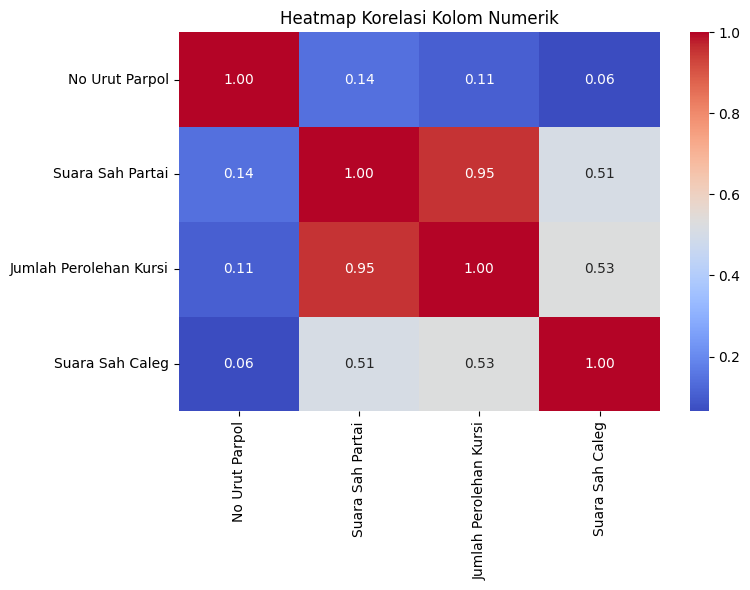

In [127]:
# Pastikan kolom numerik
numeric_cols = [
    'No Urut Parpol',
    'Suara Sah Partai',
    'Jumlah Perolehan Kursi',
    'Suara Sah Caleg'
]

# Hitung korelasi
corr_matrix = data[numeric_cols].corr()

print("Matriks Korelasi:")
print(corr_matrix)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Kolom Numerik')
plt.tight_layout()
plt.show()

## B.3 Analisis hubungan antara variabel kategorikal dan target dengan Chi-Square dan Cramér’s V


📊 Kolom: Nama Partai
terpilih                                    tidak  ya
Nama Partai                                          
 Partai Golkar                                106   7
 Partai Pelopor                                22   0
 Partai Persatuan Pembangunan                  97   7
 Partai Republika Nusantara                     2   0
Partai  Persatuan Daerah                       26   0
Partai Amanat Nasional                        106   4
Partai Barisan Nasional                        75   0
Partai Bintang Reformasi                       67   0
Partai Bulan Bintang                           89   0
Partai Buruh                                   38   0
Partai Damai Sejahtera                         95   4
Partai Demokrasi Indonesia Perjuangan         101  11
Partai Demokrasi Kebangsaan                    52   0
Partai Demokrasi Pembaruan                     75   0
Partai Demokrat                                81  32
Partai Gerakan Indonesia Raya                  71   6
Partai

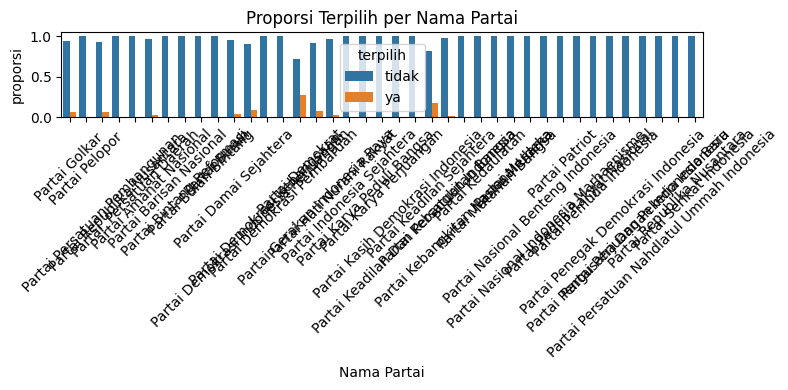

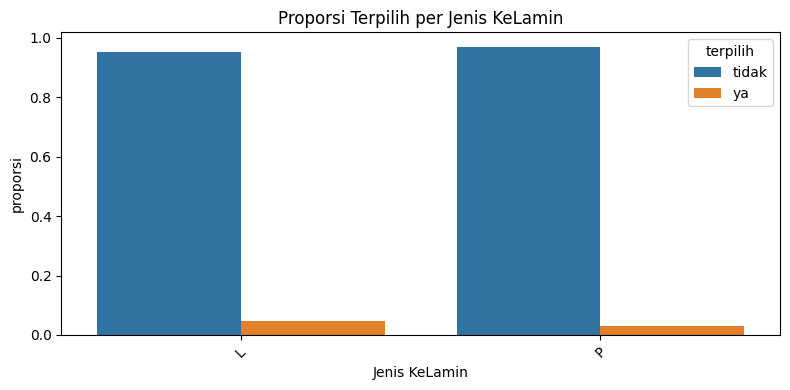

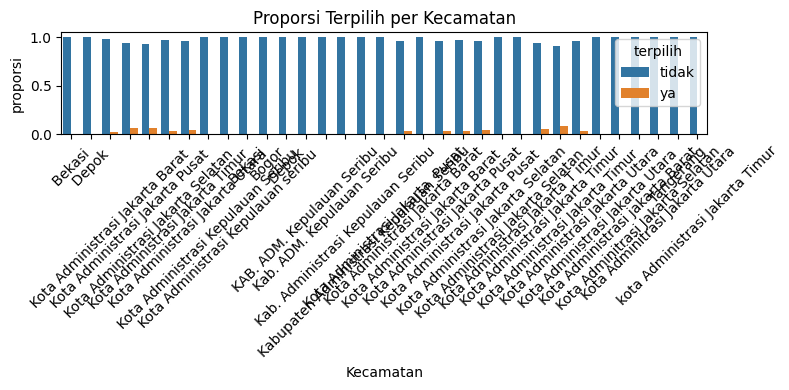

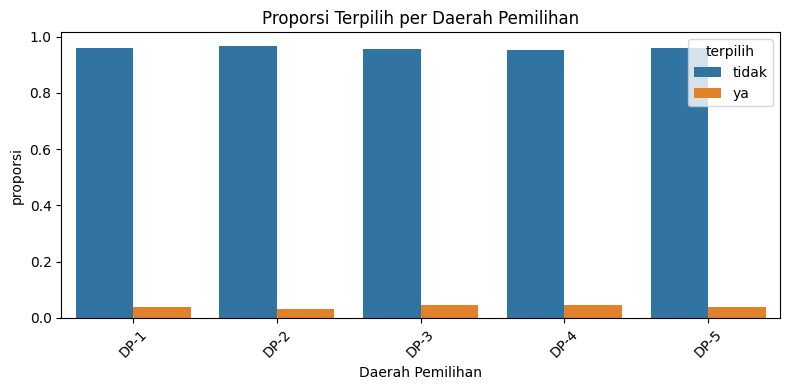

In [128]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Kolom kategorikal
categorical_cols = ["Nama Partai", "Jenis KeLamin", "Kecamatan", "Daerah Pemilihan"]

results = []

for col in categorical_cols:
    print(f"\n📊 Kolom: {col}")

    # Tabel Kontingensi
    ct = pd.crosstab(data[col], data["terpilih"])
    print(ct)

    # Chi-Square Test
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")

    # Cramér's V
    cv = cramers_v(ct)
    print(f"Cramér's V: {cv:.3f}")

    # Simpan hasil
    results.append({
        "Kolom": col,
        "Chi2": chi2,
        "p-value": p,
        "Cramér's V": cv
    })

# Tampilkan ringkasan
summary = pd.DataFrame(results)
print("\n=== Ringkasan Analisis ===")
print(summary)

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    prop_data = data.groupby(col)["terpilih"].value_counts(normalize=True).rename("proporsi").reset_index()
    sns.barplot(data=prop_data, x=col, y="proporsi", hue="terpilih")
    plt.title(f"Proporsi Terpilih per {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## B.4 Menghapus kolom dengan pola yang sangat banyak agar proses training lebih efisien

In [129]:
# Hapus kolom yang tidak diperlukan berdasarkan analisis
data = data.drop(columns=['no', 'No Urut Caleg', 'Nama Calon Legislatif', 'Jenis KeLamin', 'Kecamatan', 'Daerah Pemilihan'])

# Tampilkan informasi data untuk memastikan kolom sudah terhapus
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2267 entries, 0 to 2267
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nama Partai             2267 non-null   object
 1   No Urut Parpol          2267 non-null   int64 
 2   Suara Sah Partai        2267 non-null   int64 
 3   Jumlah Perolehan Kursi  2267 non-null   int64 
 4   Suara Sah Caleg         2267 non-null   int64 
 5   terpilih                2267 non-null   object
dtypes: int64(4), object(2)
memory usage: 124.0+ KB
None


## B.5 Encoding data ketegorikal

In [130]:
# One-Hot Encoding kolom Nama Partai
data_encoded = pd.get_dummies(data, columns=['Nama Partai'], drop_first=True)

# Mapping target
data_encoded['terpilih'] = data_encoded['terpilih'].map({'ya':1, 'tidak':0})
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2267 entries, 0 to 2267
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   No Urut Parpol                                          2267 non-null   int64
 1   Suara Sah Partai                                        2267 non-null   int64
 2   Jumlah Perolehan Kursi                                  2267 non-null   int64
 3   Suara Sah Caleg                                         2267 non-null   int64
 4   terpilih                                                2267 non-null   int64
 5   Nama Partai_ Partai Pelopor                             2267 non-null   bool 
 6   Nama Partai_ Partai Persatuan Pembangunan               2267 non-null   bool 
 7   Nama Partai_ Partai Republika Nusantara                 2267 non-null   bool 
 8   Nama Partai_Partai  Persatuan Daerah                    2267 no

## B.5 Pisahlan fitur dan target

In [131]:
X = data_encoded.drop('terpilih', axis=1)
y = data_encoded['terpilih']

## B.6 Split Data

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# C. Melatih Model dan Evaluasi

## C.1 Training dengan RandomForestClassifier

In [133]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## C.2 Evaluasi

In [134]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       435
           1       0.94      0.79      0.86        19

    accuracy                           0.99       454
   macro avg       0.96      0.89      0.93       454
weighted avg       0.99      0.99      0.99       454



## C.3 Tuning hyperparameter RandomForest Dengan GridSearch

In [135]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1_macro'
)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


## C.4 Training ulang

In [136]:
model = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       435
           1       0.73      0.84      0.78        19

    accuracy                           0.98       454
   macro avg       0.86      0.91      0.89       454
weighted avg       0.98      0.98      0.98       454



## C.5 Membuat confusion matrixnya

Confusion Matrix:
 [[429   6]
 [  3  16]]


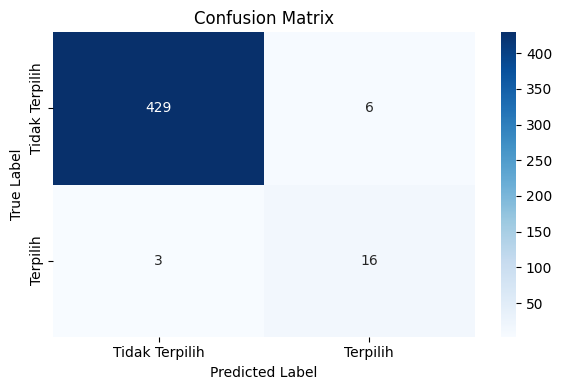

In [138]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan angka raw
print("Confusion Matrix:\n", cm)

# Buat heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Terpilih', 'Terpilih'],
            yticklabels=['Tidak Terpilih', 'Terpilih'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
